In [225]:
from IPython.display import display
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import warnings
import time
from collections import Counter
warnings.filterwarnings("ignore")


plt.style.use("fivethirtyeight")

sns.set_style({'font.sans-serif': ['simsun', 'Arial']})
sns.set_style('darkgrid', {'font.sans-serif': ['simhei', 'Arial']})
%matplotlib inline
current_date = pd.to_datetime(
    time.strftime('%Y-%m-%d', time.localtime(time.time())))

res = {}
# data_path = r'../../.././Documents/赛题1数据集/'
data_path = r'../../Data/CompInfo/'
current_date

Timestamp('2019-04-12 00:00:00')

# 企业评分

In [226]:
df_rating_copy = pd.read_excel(data_path+r'企业评分.xlsx')
df_rating = df_rating_copy.copy()
df_rating = df_rating.drop_duplicates()
res['企业得分'] = df_rating
df_base = pd.DataFrame({'企业编号': df_rating['企业编号']})

# 资产负债表

In [227]:
df_asset_bpk = pd.read_excel(data_path+r'上市信息财务信息资产负债表.xlsx')
df_asset = df_asset_bpk.copy()

In [228]:
A = ['资产:货币资金(元)', '资产:长期股权投资(元)', '资产:固定资产(元)', '资产:无形资产(元)', '负债:长期负债合计(元)', '权益:实收资本(或股本)(元)',
     '资产:流动资产合计(元)', '资产:资产总计(元)', '负债:流动负债合计(元)', '负债:负债合计(元)', '权益:股东权益合计(元)']
df_asset = df_asset[~df_asset['权益:股东权益合计(元)'].isin(['正无穷大万亿'])]
df_asset1 = pd.DataFrame({'企业编号': df_asset['企业编号'], '资产:货币资金(元)': df_asset['资产:货币资金(元)'], '资产:长期股权投资(元)': df_asset['资产:长期股权投资(元)'],
                          '资产:固定资产(元)': df_asset['资产:固定资产(元)'], '资产:无形资产(元)': df_asset['资产:无形资产(元)'], '负债:长期负债合计(元)': df_asset['负债:长期负债合计(元)'],
                          '权益:实收资本(或股本)(元)': df_asset['权益:实收资本(或股本)(元)'], '资产:流动资产合计(元)': df_asset['资产:流动资产合计(元)'],
                          '资产:资产总计(元)': df_asset['资产:资产总计(元)'], '负债:流动负债合计(元)': df_asset['负债:流动负债合计(元)'], '负债:负债合计(元)': df_asset['负债:负债合计(元)'],
                          '权益:股东权益合计(元)': df_asset['权益:股东权益合计(元)'],
                          })

In [229]:
# for arr in A:
#     chinese = set(df_asset1[arr].str.extract(
#         "([^0-9\.\-]+)", expand=False).dropna())
#     print(arr, chinese)
for arr in A:
    df_asset1.loc[(df_asset1[arr].str.contains("万") == True), arr] = df_asset1.loc[(
        df_asset1[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*0.0001
    df_asset1.loc[(df_asset1[arr].str.contains("亿") == True), arr] = df_asset1.loc[(
        df_asset1[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*1
for arr in A:
    df_asset1[arr] = pd.to_numeric(df_asset1[arr], errors='coerce')

In [230]:
df_asset1.loc[(df_asset1['资产:货币资金(元)'] > 1718) == True, '资产:货币资金(元)'] = 1718
df_asset1.loc[(df_asset1['资产:长期股权投资(元)'] > 5700)
              == True, '资产:长期股权投资(元)'] = 5700
df_asset1.loc[(df_asset1['资产:固定资产(元)'] > 6900) == True, '资产:固定资产(元)'] = 6900
df_asset1.loc[(df_asset1['资产:无形资产(元)'] > 1800) == True, '资产:无形资产(元)'] = 1800
df_asset1.loc[(df_asset1['负债:长期负债合计(元)'] > 3994)
              == True, '负债:长期负债合计(元)'] = 3994
df_asset1.loc[(df_asset1['权益:实收资本(或股本)(元)'] > 3564)
              == True, '权益:实收资本(或股本)(元)'] = 3564
df_asset1.loc[(df_asset1['资产:流动资产合计(元)'] > 13264)
              == True, '资产:流动资产合计(元)'] = 13264
df_asset1.loc[(df_asset1['资产:资产总计(元)'] > 38981) == True, '资产:资产总计(元)'] = 38981
df_asset1.loc[(df_asset1['负债:流动负债合计(元)'] > 10441)
              == True, '负债:流动负债合计(元)'] = 10441
df_asset1.loc[(df_asset1['负债:负债合计(元)'] > 259172)
              == True, '负债:负债合计(元)'] = 259172
df_asset1.loc[(df_asset1['权益:股东权益合计(元)'] > 22808)
              == True, '权益:股东权益合计(元)'] = 22808
for arr in A:
    df_asset1[arr+"滚动增长率"] = df_asset1.groupby(["企业编号"])[arr].pct_change()

In [231]:
agg_func1 = {'资产:流动资产合计(元)': ['mean', 'max', 'min', 'std'], '资产:流动资产合计(元)滚动增长率': ['mean'],
             '资产:资产总计(元)': ['mean', 'max', 'min', 'std'], '资产:资产总计(元)滚动增长率': ['mean'],
             '负债:流动负债合计(元)': ['mean', 'max', 'min', 'std'], '负债:流动负债合计(元)滚动增长率': ['mean'],
             '负债:负债合计(元)': ['mean', 'max', 'min', 'std'], '负债:负债合计(元)滚动增长率': ['mean'],
             '权益:股东权益合计(元)': ['mean', 'max', 'min', 'std'], '权益:股东权益合计(元)滚动增长率': ['mean'],
             '资产:货币资金(元)': ['mean', 'max', 'min', 'std'], '资产:货币资金(元)滚动增长率': ['mean'],
             '资产:长期股权投资(元)': ['mean', 'max', 'min', 'std'], '资产:长期股权投资(元)滚动增长率': ['mean'],
             '资产:固定资产(元)': ['mean', 'max', 'min', 'std'], '资产:固定资产(元)滚动增长率': ['mean'],
             '资产:无形资产(元)': ['mean', 'max', 'min', 'std'], '资产:无形资产(元)滚动增长率': ['mean'],
             '权益:实收资本(或股本)(元)': ['mean', 'max', 'min', 'std'], '权益:实收资本(或股本)(元)滚动增长率': ['mean'], }
df_asset1_new = df_asset1.groupby(['企业编号']).agg(agg_func1)
df_asset1_new.columns = ['_'.join(col) for col in df_asset1_new.columns.values]
df_asset1_new.columns = [
    '资产:流动资产合计(元)_mean', '资产:流动资产合计(元)_max', '资产:流动资产合计(元)_min', '资产:流动资产合计(元)_std', '资产:流动资产合计(元)滚动增长_mean',
    '资产:资产总计(元)_mean', '资产:资产总计(元)_max', '资产:资产总计(元)_min', '资产:资产总计(元)_std', '资产:资产总计(元)滚动增长_mean',
    '负债:流动负债合计(元)_mean', '负债:流动负债合计(元)_max', '负债:流动负债合计(元)_min', '负债:流动负债合计(元)_std', '负债:流动负债合计(元)滚动增长_mean',
    '负债:负债合计(元)_mean', '负债:负债合计(元)_max', '负债:负债合计(元)_min', '负债:负债合计(元)_std', '负债:负债合计(元)滚动增长_mean',
    '权益:股东权益合计(元)_mean', '权益:股东权益合计(元)_max', '权益:股东权益合计(元)_min', '权益:股东权益合计(元)_std', '权益:股东权益合计(元)滚动增长_mean',
    '资产:货币资金(元)_mean', '资产:货币资金(元)_max', '资产:货币资金(元)_min', '资产:货币资金(元)_std', '资产:货币资金(元)滚动增长_mean',
    '资产:长期股权投资(元)_mean', '资产:长期股权投资(元)_max', '资产:长期股权投资(元)_min', '资产:长期股权投资(元)_std', '资产:长期股权投资(元)滚动增长_mean',
    '资产:固定资产(元)_mean', '资产:固定资产(元)_max', '资产:固定资产(元)_min', '资产:固定资产(元)_std', '资产:固定资产(元)滚动增长_mean',
    '资产:无形资产(元)_mean', '资产:无形资产(元)_max', '资产:无形资产(元)_min', '资产:无形资产(元)_std', '资产:无形资产(元)滚动增长_mean',
    '权益:实收资本(或股本)(元)_mean', '权益:实收资本(或股本)(元)_max', '权益:实收资本(或股本)(元)_min', '权益:实收资本(或股本)(元)__std', '权益:实收资本(或股本)(元)滚动增长_mean', ]
df_asset1_new.loc[(df_asset1_new['资产:长期股权投资(元)滚动增长_mean'] ==
                   np.inf) == True, '资产:长期股权投资(元)滚动增长_mean'] = np.nan
df_asset1_new.loc[(df_asset1_new['权益:实收资本(或股本)(元)滚动增长_mean']
                   == np.inf) == True, '权益:实收资本(或股本)(元)滚动增长_mean'] = np.nan
df_asset1_new.fillna(df_asset1_new.mean(), inplace=True)

In [232]:
df_asset1_new_merge = df_base.merge(
    df_asset1_new, how='left', right_index=True, left_on="企业编号")
df_asset1_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 51 columns):
企业编号                        2956 non-null int64
资产:流动资产合计(元)_mean           2956 non-null float64
资产:流动资产合计(元)_max            2956 non-null float64
资产:流动资产合计(元)_min            2956 non-null float64
资产:流动资产合计(元)_std            2956 non-null float64
资产:流动资产合计(元)滚动增长_mean       2956 non-null float64
资产:资产总计(元)_mean             2956 non-null float64
资产:资产总计(元)_max              2956 non-null float64
资产:资产总计(元)_min              2956 non-null float64
资产:资产总计(元)_std              2956 non-null float64
资产:资产总计(元)滚动增长_mean         2956 non-null float64
负债:流动负债合计(元)_mean           2956 non-null float64
负债:流动负债合计(元)_max            2956 non-null float64
负债:流动负债合计(元)_min            2956 non-null float64
负债:流动负债合计(元)_std            2956 non-null float64
负债:流动负债合计(元)滚动增长_mean       2956 non-null float64
负债:负债合计(元)_mean             2956 non-null float64
负债:负债合计(元)_max              2956 non-null flo

In [233]:
res['资产负债表'] = df_asset1_new_merge

# 利润表

In [234]:
df_profit_bpk = pd.read_excel(data_path+r'上市信息财务信息-利润表.xlsx')
df_profit = df_profit_bpk.copy()
B = ['营业成本(元)', '销售费用(元)', '财务费用(元)', '管理费用(元)', '投资收益(元)',
     '营业利润(元)', '利润总额(元)', '归属母公司所有者净利润(元)']
# for arr in B:
#     chinese = set(df_profit[arr].str.extract(
#         "([^0-9\.\-]+)", expand=False).dropna())
#     print(arr, chinese)
for arr in B:
    df_profit.loc[(df_profit[arr].str.contains("万") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*10000
    df_profit.loc[(df_profit[arr].str.contains("亿") == True), arr] = df_profit.loc[(
        df_profit[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*100000000
    df_profit[arr] = pd.to_numeric(df_profit[arr], errors='coerce')
df_profit1 = df_profit.drop(
    ['标题', '日期', '营业收入(元)', '资产减值损失(元)', '资产减值损失(元)', '所得税(元)'], axis=1)
for arr in B:
    df_profit1[arr+"滚动增长率"] = df_profit1.groupby(["企业编号"])[arr].pct_change()

In [235]:
agg_func2 = {
    '营业成本(元)':  ['mean', 'max', 'min', 'std'], '营业成本(元)滚动增长率':  ['mean'],
    '营业利润(元)': ['mean', 'max', 'min', 'std'], '营业利润(元)滚动增长率':  ['mean'],
    '利润总额(元)': ['mean', 'max', 'min', 'std'], '利润总额(元)滚动增长率':  ['mean'],
    '销售费用(元)': ['mean', 'max', 'min', 'std'], '销售费用(元)滚动增长率':  ['mean'],
    '财务费用(元)':  ['mean', 'max', 'min', 'std'], '财务费用(元)滚动增长率':  ['mean'],
    '管理费用(元)': ['mean', 'max', 'min', 'std'], '管理费用(元)滚动增长率':  ['mean'],
    '投资收益(元)': ['mean', 'max', 'min', 'std'], '投资收益(元)滚动增长率':  ['mean'],
}
df_profit1_new = df_profit1.groupby(['企业编号']).agg(agg_func2)
df_profit1_new.columns = ['_'.join(col)
                          for col in df_profit1_new.columns.values]
df_profit1_new.columns = [
    '营业成本(元)_mean', '营业成本(元)_max', '营业成本(元)_min', '营业成本(元)_std', '营业成本(元)滚动增长_mean',
    '营业利润(元)_mean', '营业利润(元)_max', '营业利润(元)_min', '营业利润(元)_std', '营业利润(元)滚动增长_mean',
    '利润总额(元)_mean', '利润总额(元)_max', '利润总额(元)_min', '利润总额(元)_std', '利润总额(元)滚动增长_mean',
    '销售费用(元)_mean', '销售费用(元)_max', '销售费用(元)_min', '销售费用(元)_std', '销售费用(元)滚动增长_mean',
    '财务费用(元)_mean', '财务费用(元)_max', '财务费用(元)_min', '财务费用(元)_std', '财务费用(元)滚动增长_mean',
    '管理费用(元)_mean', '管理费用(元)_max', '管理费用(元)_min', '管理费用(元)_std', '管理费用(元)滚动增长_mean',
    '投资收益(元)_mean', '投资收益(元)_max', '投资收益(元)_min', '投资收益(元)_std', '投资收益(元)滚动增长_mean']
df_profit1_new.loc[(df_profit1_new['投资收益(元)滚动增长_mean'] ==
                    np.inf) == True, '投资收益(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['管理费用(元)滚动增长_mean'] ==
                    np.inf) == True, '管理费用(元)滚动增长_mean'] = np.nan
df_profit1_new.loc[(df_profit1_new['营业成本(元)滚动增长_mean'] ==
                    np.inf) == True, '营业成本(元)滚动增长_mean'] = np.nan
df_profit1_new.fillna(df_profit1_new.mean(), inplace=True)

In [236]:
df_profit1_new.mean()

营业成本(元)_mean        5.599905e+09
营业成本(元)_max         9.326403e+09
营业成本(元)_min         2.101582e+09
营业成本(元)_std         2.604276e+09
营业成本(元)滚动增长_mean    1.459089e+00
营业利润(元)_mean        9.589993e+08
营业利润(元)_max         1.637181e+09
营业利润(元)_min         3.067895e+08
营业利润(元)_std         4.903250e+08
营业利润(元)滚动增长_mean    1.330581e-01
利润总额(元)_mean        9.658763e+08
利润总额(元)_max         1.646146e+09
利润总额(元)_min         3.081771e+08
利润总额(元)_std         4.936287e+08
利润总额(元)滚动增长_mean    5.299921e-01
销售费用(元)_mean        2.861782e+08
销售费用(元)_max         4.850571e+08
销售费用(元)_min         1.103998e+08
销售费用(元)_std         1.350301e+08
销售费用(元)滚动增长_mean    9.416290e-01
财务费用(元)_mean        1.074241e+08
财务费用(元)_max         1.950526e+08
财务费用(元)_min         3.026210e+07
财务费用(元)_std         6.068512e+07
财务费用(元)滚动增长_mean    7.097288e-01
管理费用(元)_mean        5.743908e+08
管理费用(元)_max         1.069926e+09
管理费用(元)_min         2.242090e+08
管理费用(元)_std         2.977270e+08
管理费用(元)滚动增长_mean    4.843972e-01
投资收益(元)_me

In [237]:
df_profit1_new_merge = df_base.merge(
    df_profit1_new, how='left', right_index=True, left_on="企业编号")
df_profit1_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 36 columns):
企业编号                2956 non-null int64
营业成本(元)_mean        2956 non-null float64
营业成本(元)_max         2956 non-null float64
营业成本(元)_min         2956 non-null float64
营业成本(元)_std         2956 non-null float64
营业成本(元)滚动增长_mean    2956 non-null float64
营业利润(元)_mean        2956 non-null float64
营业利润(元)_max         2956 non-null float64
营业利润(元)_min         2956 non-null float64
营业利润(元)_std         2956 non-null float64
营业利润(元)滚动增长_mean    2956 non-null float64
利润总额(元)_mean        2956 non-null float64
利润总额(元)_max         2956 non-null float64
利润总额(元)_min         2956 non-null float64
利润总额(元)_std         2956 non-null float64
利润总额(元)滚动增长_mean    2956 non-null float64
销售费用(元)_mean        2956 non-null float64
销售费用(元)_max         2956 non-null float64
销售费用(元)_min         2956 non-null float64
销售费用(元)_std         2956 non-null float64
销售费用(元)滚动增长_mean    2956 non-null float64
财务费用(元)_mean 

In [238]:
res['利润表'] = df_profit1_new_merge

# 现金流量表

In [239]:
df_cash_bpk = pd.read_excel(data_path+r'上市信息财务信息-现金流量表.xlsx')
df_cash = df_cash_bpk.copy()

In [240]:
df_cash1 = pd.DataFrame({'企业编号': df_cash['企业编号'], '经营流入': df_cash['经营:经营活动现金流入小计(元)'],
                         '经营净额': df_cash['经营:经营活动产生的现金流量净额(元)'], '投资流出': df_cash['投资:投资活动现金流出小计(元)'], '投资净额': df_cash['投资:投资活动产生的现金流量净额(元)'],
                         '筹资流入': df_cash['筹资:筹资活动现金流入小计(元)'], '筹资净额': df_cash['筹资活动产生的现金流量净额(元)'], })
C = ['经营流入', '经营净额', '投资流出', '投资净额', '筹资流入', '筹资净额']
# for arr in C:
#     chinese = set(df_cash1[arr].str.extract(
#         "([^0-9\.\-]+)", expand=False).dropna())
#     print(arr, chinese)
for arr in C:
    df_cash1.loc[(df_cash1[arr].str.contains("万") == True), arr] = df_cash1.loc[(
        df_cash1[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*0.0001
    df_cash1.loc[(df_cash1[arr].str.contains("亿") == True), arr] = df_cash1.loc[(
        df_cash1[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*1
    df_cash1[arr] = pd.to_numeric(df_cash1[arr], errors='coerce')
    df_cash1[arr+"滚动增长率"] = df_cash1.groupby(["企业编号"])[arr].pct_change()

In [241]:
agg_func3 = {
    '经营流入':  ['mean', 'max', 'min', 'std'], '经营流入滚动增长率':  ['mean'],
    '经营净额': ['mean', 'max', 'min', 'std'], '经营净额滚动增长率':  ['mean'],
    '投资流出': ['mean', 'max', 'min', 'std'], '投资流出滚动增长率':  ['mean'],
    '投资净额': ['mean', 'max', 'min', 'std'], '投资净额滚动增长率':  ['mean'],
    '筹资流入': ['mean', 'max', 'min', 'std'], '筹资流入滚动增长率':  ['mean'],
    '筹资净额':  ['mean', 'max', 'min', 'std'], '筹资净额滚动增长率':  ['mean'],
}
df_cash1_new = df_cash1.groupby(['企业编号']).agg(agg_func3)
df_cash1_new.columns = ['_'.join(col) for col in df_cash1_new.columns.values]
df_cash1_new.columns = [
    '经营流入_mean', '经营流入_max', '经营流入_min', '经营流入_std', '经营流入滚动增长_mean',
    '经营净额_mean', '经营净额_max', '经营净额_min', '经营净额_std', '经营净额滚动增长_mean',
    '投资流出_mean', '投资流出_max', '投资流出_min', '投资流出_std', '投资流出滚动增长_mean',
    '投资净额_mean', '投资净额_max', '投资净额_min', '投资净额_std', '投资净额滚动增长_mean',
    '筹资流入_mean', '筹资流入_max', '筹资流入_min', '筹资流入_std', '筹资流入滚动增长_mean',
    '筹资净额_mean', '筹资净额_max', '筹资净额_min', '筹资净额_std', '筹资净额滚动增长_mean', ]
df_cash1_new.loc[(df_cash1_new['筹资流入滚动增长_mean'] == np.inf)
                 == True, '筹资流入滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['筹资净额滚动增长_mean'] == np.inf)
                 == True, '筹资净额滚动增长_mean'] = np.nan
df_cash1_new.loc[(df_cash1_new['投资流出滚动增长_mean'] == np.inf)
                 == True, '投资流出滚动增长_mean'] = np.nan
df_cash1_new.fillna(df_cash1_new.mean(), inplace=True)

In [242]:
df_cash1_new_merge = df_base.merge(
    df_cash1_new, how='left', right_index=True, left_on="企业编号")
df_cash1_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 31 columns):
企业编号             2956 non-null int64
经营流入_mean        2956 non-null float64
经营流入_max         2956 non-null float64
经营流入_min         2956 non-null float64
经营流入_std         2956 non-null float64
经营流入滚动增长_mean    2956 non-null float64
经营净额_mean        2956 non-null float64
经营净额_max         2956 non-null float64
经营净额_min         2956 non-null float64
经营净额_std         2956 non-null float64
经营净额滚动增长_mean    2956 non-null float64
投资流出_mean        2956 non-null float64
投资流出_max         2956 non-null float64
投资流出_min         2956 non-null float64
投资流出_std         2956 non-null float64
投资流出滚动增长_mean    2956 non-null float64
投资净额_mean        2956 non-null float64
投资净额_max         2956 non-null float64
投资净额_min         2956 non-null float64
投资净额_std         2956 non-null float64
投资净额滚动增长_mean    2956 non-null float64
筹资流入_mean        2956 non-null float64
筹资流入_max         2956 non-null float6

In [243]:
res['现金流量表'] = df_cash1_new_merge

# 每股指标

In [244]:
df_meiguzhibiao_bpk = pd.read_excel(data_path+r'上市公司财务信息-每股指标.xlsx')
df_meiguzhibiao = df_meiguzhibiao_bpk.copy()
df_meiguzhibiao1 = df_meiguzhibiao.drop(['标题', '日期', '稀释每股收益(元)'], axis=1)
D = ['基本每股收益(元)', '每股净资产(元)', '每股公积金(元)', '每股未分配利润(元)', '每股经营现金流(元)']
for arr in D:
    df_meiguzhibiao1[arr] = pd.to_numeric(
        df_meiguzhibiao1[arr], errors='coerce')
    df_meiguzhibiao1[arr +
                     "滚动增长率"] = df_meiguzhibiao1.groupby(["企业编号"])[arr].pct_change()

In [245]:
agg_func4 = {
    '基本每股收益(元)':  ['mean', 'max', 'min', 'std'], '基本每股收益(元)滚动增长率':  ['mean'],
    '每股净资产(元)': ['mean', 'max', 'min', 'std'], '每股净资产(元)滚动增长率':  ['mean'],
    '每股未分配利润(元)': ['mean', 'max', 'min', 'std'], '每股未分配利润(元)滚动增长率':  ['mean'],
    '每股经营现金流(元)':  ['mean', 'max', 'min', 'std'], '每股经营现金流(元)滚动增长率':  ['mean'],
    '每股公积金(元)':  ['mean', 'max', 'min', 'std'],
}
df_meiguzhibiao1_new = df_meiguzhibiao1.groupby(['企业编号']).agg(agg_func4)
df_meiguzhibiao1_new.columns = [
    '_'.join(col) for col in df_meiguzhibiao1_new.columns.values]
df_meiguzhibiao1_new.columns = [
    '基本每股收益(元)_mean', '基本每股收益(元)_max', '基本每股收益(元)_min', '基本每股收益(元)_std', '基本每股收益(元)滚动增长_mean',
    '每股净资产(元)_mean', '每股净资产(元)_max', '每股净资产(元)_min', '每股净资产(元)_std', '每股净资产(元)滚动增长_mean',
    '每股未分配利润(元)_mean', '每股未分配利润(元)_max', '每股未分配利润(元)_min', '每股未分配利润(元)_std', '每股未分配利润(元)滚动增长_mean',
    '每股经营现金流(元)_mean', '每股经营现金流(元)_max', '每股经营现金流(元)_min', '每股经营现金流(元)_std', '每股经营现金流(元)滚动增长_mean', '每股公积金(元)_mean', '每股公积金(元)_max', '每股公积金(元)_min', '每股公积金(元)_std']
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['基本每股收益(元)滚动增长_mean']
                          == np.inf) == True, '基本每股收益(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.loc[(df_meiguzhibiao1_new['每股经营现金流(元)滚动增长_mean']
                          == np.inf) == True, '每股经营现金流(元)滚动增长_mean'] = np.nan
df_meiguzhibiao1_new.fillna(df_meiguzhibiao1_new.mean(), inplace=True)

In [246]:
df_meiguzhibiao1_new_merge = df_base.merge(
    df_meiguzhibiao1_new, how='left', right_index=True, left_on="企业编号")
df_meiguzhibiao1_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 25 columns):
企业编号                   2956 non-null int64
基本每股收益(元)_mean         2956 non-null float64
基本每股收益(元)_max          2956 non-null float64
基本每股收益(元)_min          2956 non-null float64
基本每股收益(元)_std          2956 non-null float64
基本每股收益(元)滚动增长_mean     2956 non-null float64
每股净资产(元)_mean          2956 non-null float64
每股净资产(元)_max           2956 non-null float64
每股净资产(元)_min           2956 non-null float64
每股净资产(元)_std           2956 non-null float64
每股净资产(元)滚动增长_mean      2956 non-null float64
每股未分配利润(元)_mean        2956 non-null float64
每股未分配利润(元)_max         2956 non-null float64
每股未分配利润(元)_min         2956 non-null float64
每股未分配利润(元)_std         2956 non-null float64
每股未分配利润(元)滚动增长_mean    2956 non-null float64
每股经营现金流(元)_mean        2956 non-null float64
每股经营现金流(元)_max         2956 non-null float64
每股经营现金流(元)_min         2956 non-null float64
每股经营现金流(元)_std         2956 non-null flo

In [247]:
res['每股指标'] = df_meiguzhibiao1_new_merge

# 成长能力指标

In [248]:
df_growth_bpk = pd.read_excel(data_path+r'上市信息财务信息-成长能力指标.xlsx')
df_growth = df_growth_bpk.copy()
df_growth = df_growth.drop(
    ['标题', '日期', '扣非净利润(元)', '归属净利润同比增长(元)', '扣非净利润滚动环比增长(元)'], axis=1)
E = ['营业总收入(元)', '毛利润(元)', '归属净利润(元)']
for arr in E:
    df_growth.loc[(df_growth[arr].str.contains("万亿") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("万亿") == True), arr].str.replace('万亿', '').astype(float)*1000000000000
    df_growth.loc[(df_growth[arr].str.contains("万") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("万") == True), arr].str.replace('万', '').astype(float)*10000
    df_growth.loc[(df_growth[arr].str.contains("亿") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("亿") == True), arr].str.replace('亿', '').astype(float)*100000000
F = ['营业总收入同比增长(元)', '扣非净利润同比增长(元)', '营业总收入滚动环比增长(元)', '归属净利润滚动环比增长(元)']
for arr in F:
    df_growth[arr] = df_growth[arr].replace('--%', np.nan)
for arr in F:
    df_growth.loc[(df_growth[arr].str.contains("%") == True), arr] = df_growth.loc[(
        df_growth[arr].str.contains("%") == True), arr].str.replace(',', '').str.rstrip('%').astype(float)/100
df_growth = df_growth.convert_objects(convert_numeric=True)
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28887 entries, 0 to 28886
Data columns (total 8 columns):
企业编号              28887 non-null int64
营业总收入(元)          28877 non-null float64
毛利润(元)            28185 non-null float64
归属净利润(元)          28887 non-null float64
营业总收入同比增长(元)      28229 non-null float64
扣非净利润同比增长(元)      22907 non-null float64
营业总收入滚动环比增长(元)    27449 non-null float64
归属净利润滚动环比增长(元)    25957 non-null float64
dtypes: float64(7), int64(1)
memory usage: 1.8 MB


In [249]:
agg_func5 = {
    '营业总收入(元)':   ['mean', 'max', 'min', 'std'],
    '归属净利润(元)':  ['mean', 'max', 'min', 'std'],
    '营业总收入同比增长(元)':  ['mean', 'max', 'min', 'std'],
    '扣非净利润同比增长(元)':   ['mean', 'max', 'min', 'std'],
    '毛利润(元)': ['mean', 'max', 'min', 'std'],
    '营业总收入滚动环比增长(元)':  ['mean'], '归属净利润滚动环比增长(元)':  ['mean'],
}
df_growth_new = df_growth.groupby(['企业编号']).agg(agg_func5)
df_growth_new.columns = ['_'.join(col) for col in df_growth_new.columns.values]
df_growth_new.columns = [
    '营业总收入(元)_mean', '营业总收入(元)_max', '营业总收入(元)_min', '营业总收入(元)_std',
    '归属净利润(元)_mean', '归属净利润(元)_max', '归属净利润(元)_min',  '归属净利润(元)_std',
    '营业总收入同比增长(元)_mean', '营业总收入同比增长(元)_max', '营业总收入同比增长(元)_min', '营业总收入同比增长(元)_std',
    '扣非净利润同比增长(元)_mean', '扣非净利润同比增长(元)_max', '扣非净利润同比增长(元)_min', '扣非净利润同比增长(元)_std',
    '毛利润(元)_mean', '毛利润(元)_max', '毛利润(元)_min', '毛利润(元)_std', '营业总收入滚动环比增长_mean', '归属净利润滚动环比增长_mean']
df_growth_new.fillna(df_growth_new.mean(), inplace=True)

In [250]:
df_growth_new_merge = df_base.merge(
    df_growth_new, how='left', right_index=True, left_on="企业编号")
df_growth_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 23 columns):
企业编号                 2956 non-null int64
营业总收入(元)_mean        2956 non-null float64
营业总收入(元)_max         2956 non-null float64
营业总收入(元)_min         2956 non-null float64
营业总收入(元)_std         2956 non-null float64
归属净利润(元)_mean        2956 non-null float64
归属净利润(元)_max         2956 non-null float64
归属净利润(元)_min         2956 non-null float64
归属净利润(元)_std         2956 non-null float64
营业总收入同比增长(元)_mean    2956 non-null float64
营业总收入同比增长(元)_max     2956 non-null float64
营业总收入同比增长(元)_min     2956 non-null float64
营业总收入同比增长(元)_std     2956 non-null float64
扣非净利润同比增长(元)_mean    2956 non-null float64
扣非净利润同比增长(元)_max     2956 non-null float64
扣非净利润同比增长(元)_min     2956 non-null float64
扣非净利润同比增长(元)_std     2956 non-null float64
毛利润(元)_mean          2956 non-null float64
毛利润(元)_max           2956 non-null float64
毛利润(元)_min           2956 non-null float64
毛利润(元)_std           2956 non-null 

In [251]:
res['成长能力指标'] = df_growth_new_merge

# 盈利能力指标

In [252]:
df_abilityofprofit_bpk = pd.read_excel(data_path+r'上市信息财务信息盈利能力指标.xlsx')
df_abilityofprofit = df_abilityofprofit_bpk.copy()
G = ['加权净资产收益率(%)', '摊薄净资产收益率(%)', '摊薄总资产收益率(%)',
     '毛利率(%)', '净利率(%)', '实际税率(%)']
for arr in G:
    df_abilityofprofit[arr] = df_abilityofprofit[arr].replace('--%', np.nan)
    df_abilityofprofit[arr] = df_abilityofprofit[arr].str.rstrip(
        '%').astype(float)/100
df_abilityofprofit.convert_objects(convert_numeric=True)
df_abilityofprofit = df_abilityofprofit.drop(['标题', '日期'], axis=1)
for arr in G:
    df_abilityofprofit[arr +
                       "滚动增长率"] = df_abilityofprofit.groupby(["企业编号"])[arr].pct_change()

In [253]:
agg_func6 = {
    '加权净资产收益率(%)':  ['mean', 'max', 'min', 'std'], '加权净资产收益率(%)滚动增长率':  ['mean'],
    '毛利率(%)': ['mean', 'max', 'min', 'std'], '毛利率(%)滚动增长率':  ['mean'],
    '净利率(%)':  ['mean', 'max', 'min', 'std'], '净利率(%)滚动增长率':  ['mean'],
    '实际税率(%)':  ['mean', 'max', 'min', 'std'], '实际税率(%)滚动增长率':  ['mean'],
    '摊薄总资产收益率(%)':  ['mean', 'max', 'min', 'std'], '摊薄总资产收益率(%)滚动增长率':  ['mean'],
}
df_abilityofprofit_new = df_abilityofprofit.groupby(['企业编号']).agg(agg_func6)
df_abilityofprofit_new.columns = [
    '_'.join(col) for col in df_abilityofprofit_new.columns.values]
df_abilityofprofit_new.columns = [
    '加权净资产收益率(%)_mean', '加权净资产收益率(%)_max', '加权净资产收益率(%)_min', '加权净资产收益率(%)_std', '加权净资产收益率滚动增长_mean',
    '毛利率(%)_mean', '毛利率(%)_max', '毛利率(%)_min',  '毛利率(%)_std', '毛利率滚动增长_mean',
    '净利率(%)_mean', '净利率(%)_max', '净利率(%)_min', '净利率(%)_std', '净利率滚动增长_mean',
    '实际税率(%)_mean', '实际税率(%)_max', '实际税率(%)_min',  '实际税率(%)_std', '实际税率滚动增长_mean',
    '摊薄总资产收益率(%)_mean', '摊薄总资产收益率(%)_max', '摊薄总资产收益率(%)_min', '摊薄总资产收益率(%)_std', '摊薄总资产收益率滚动增长_mean', ]
df_abilityofprofit_new.loc[(
    df_abilityofprofit_new['实际税率滚动增长_mean'] == np.inf) == True, '实际税率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['摊薄总资产收益率滚动增长_mean']
                            == np.inf) == True, '摊薄总资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(df_abilityofprofit_new['加权净资产收益率滚动增长_mean']
                            == np.inf) == True, '加权净资产收益率滚动增长_mean'] = np.nan
df_abilityofprofit_new.loc[(
    df_abilityofprofit_new['净利率滚动增长_mean'] == np.inf) == True, '净利率滚动增长_mean'] = np.nan
df_abilityofprofit_new.fillna(df_abilityofprofit_new.mean(), inplace=True)

In [254]:
df_abilityofprofit_new_merge = df_base.merge(
    df_abilityofprofit_new, how='left', right_index=True, left_on="企业编号")
df_abilityofprofit_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 26 columns):
企业编号                 2956 non-null int64
加权净资产收益率(%)_mean     2956 non-null float64
加权净资产收益率(%)_max      2956 non-null float64
加权净资产收益率(%)_min      2956 non-null float64
加权净资产收益率(%)_std      2956 non-null float64
加权净资产收益率滚动增长_mean    2956 non-null float64
毛利率(%)_mean          2956 non-null float64
毛利率(%)_max           2956 non-null float64
毛利率(%)_min           2956 non-null float64
毛利率(%)_std           2956 non-null float64
毛利率滚动增长_mean         2956 non-null float64
净利率(%)_mean          2956 non-null float64
净利率(%)_max           2956 non-null float64
净利率(%)_min           2956 non-null float64
净利率(%)_std           2956 non-null float64
净利率滚动增长_mean         2956 non-null float64
实际税率(%)_mean         2956 non-null float64
实际税率(%)_max          2956 non-null float64
实际税率(%)_min          2956 non-null float64
实际税率(%)_std          2956 non-null float64
实际税率滚动增长_mean        2956 non-null 

In [255]:
res['盈利能力能力'] = df_abilityofprofit_new_merge

# 财务风险指标

In [256]:
df_risk_bpk = pd.read_excel(data_path+r'上市信息财务信息-财务风险指标.xlsx')
df_risk = df_risk_bpk.copy()
H = ['流动比率', '速动比率']
for arr in H:
    df_risk[arr] = pd.to_numeric(df_risk[arr], errors='coerce')
I = ['资产负债率(%)', '流动负债/总负债(%)']
for arr in I:
    df_risk[arr] = df_risk[arr].replace('--%', np.nan)
df_risk.convert_objects(convert_numeric=True)
for arr in I:
    df_risk[arr] = df_risk[arr].str.rstrip('%').astype(float)/100
df_risk.convert_objects(convert_numeric=True)
df_risk = df_risk.drop(['标题', '日期', '速动比率'], axis=1)
df_risk = df_risk.loc[df_risk['流动比率'] < 66.6]
df_risk = df_risk.loc[df_risk['资产负债率(%)'] < 2.93]
for arr in I:
    df_risk[arr+'滚动增长率'] = df_risk.groupby(['企业编号'])[arr].pct_change()
df_risk['流动比率滚动增长率'] = df_risk.groupby(['企业编号'])['流动比率'].pct_change()

In [257]:
agg_func7 = {
    '资产负债率(%)':   ['mean', 'max', 'min', 'std'], '资产负债率(%)滚动增长率':  ['mean'],
    '流动负债/总负债(%)': ['mean', 'max', 'min', 'std'], '流动负债/总负债(%)滚动增长率':  ['mean'],
    '流动比率':  ['mean', 'max', 'min', 'std'], '流动比率滚动增长率':  ['mean'],
}
df_risk_new = df_risk.groupby(['企业编号']).agg(agg_func7)
df_risk_new.columns = ['_'.join(col) for col in df_risk_new.columns.values]
df_risk_new.columns = [
    '资产负债率_mean', '资产负债率_max', '资产负债率_min', '资产负债率_std', '资产负债率滚动增长_mean',
    '流动负债/总负债_mean', '流动负债/总负债_max', '流动负债/总负债_min', '流动负债/总负债_std', '流动负债/总负债滚动增长_mean',
    '流动比率_mean', '流动比率_max', '流动比率_min', '流动比率_std', '流动比率滚动增长_mean', ]
df_risk_new.fillna(df_risk_new.mean(), inplace=True)

In [258]:
df_risk_new_merge = df_base.merge(
    df_risk_new, how='left', right_index=True, left_on="企业编号")
df_risk_new_merge.fillna(df_risk_new_merge.mean(), inplace=True)
df_risk_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 16 columns):
企业编号                 2956 non-null int64
资产负债率_mean           2956 non-null float64
资产负债率_max            2956 non-null float64
资产负债率_min            2956 non-null float64
资产负债率_std            2956 non-null float64
资产负债率滚动增长_mean       2956 non-null float64
流动负债/总负债_mean        2956 non-null float64
流动负债/总负债_max         2956 non-null float64
流动负债/总负债_min         2956 non-null float64
流动负债/总负债_std         2956 non-null float64
流动负债/总负债滚动增长_mean    2956 non-null float64
流动比率_mean            2956 non-null float64
流动比率_max             2956 non-null float64
流动比率_min             2956 non-null float64
流动比率_std             2956 non-null float64
流动比率滚动增长_mean        2956 non-null float64
dtypes: float64(15), int64(1)
memory usage: 392.6 KB


In [259]:
res['财务风险能力'] = df_risk_new_merge

# 运营能力指标

In [260]:
df_operation_bpk = pd.read_excel(data_path+r'上市信息财务信息运营能力指标.xlsx')
df_operation = df_operation_bpk.copy()
J = ['总资产周转率(次)', '应收账款周转天数(天)', '存货周转天数(天)']
for arr in J:
    df_operation[arr] = pd.to_numeric(df_operation[arr], errors='coerce')
df_operation = df_operation.drop(['标题', '日期'], axis=1)
df_operation = df_operation.loc[df_operation['应收账款周转天数(天)'] > 0]
df_operation = df_operation.loc[(df_operation['存货周转天数(天)'] > 0) & (
    df_operation['存货周转天数(天)'] < 600000)]
for arr in J:
    df_operation[arr +
                 "滚动增长率"] = df_operation.groupby(["企业编号"])[arr].pct_change()

In [261]:
agg_func8 = {
    '总资产周转率(次)':  ['mean', 'max', 'min', 'std'], '总资产周转率(次)滚动增长率': ['mean'],
    '应收账款周转天数(天)': ['mean', 'max', 'min', 'std'], '应收账款周转天数(天)滚动增长率': ['mean'],
    '存货周转天数(天)': ['mean', 'max', 'min', 'std'], '存货周转天数(天)滚动增长率': ['mean'],
}
df_operation_new = df_operation.groupby(['企业编号']).agg(agg_func8)
df_operation_new.columns = ['_'.join(col)
                            for col in df_operation_new.columns.values]
df_operation_new.columns = [
    '总资产周转率(次)_mean', '总资产周转率(次)_max', '总资产周转率(次)_min', '总资产周转率(次)_std', '总资产周转率(次)滚动增长_mean',
    '应收账款周转天数(天)_mean', '应收账款周转天数(天)_max', '应收账款周转天数(天)_min', '应收账款周转天数(天)_std', '应收账款周转天数(天)滚动增长_mean',
    '存货周转天数(天)_mean', '存货周转天数(天)_max', '存货周转天数(天)_min', '存货周转天数(天)_std', '存货周转天数(天)滚动增长_mean']
df_operation_new.loc[(
    df_operation_new['总资产周转率(次)滚动增长_mean'] == np.inf) == True, '总资产周转率(次)滚动增长_mean'] = np.nan
df_operation_new.fillna(df_operation_new.mean(), inplace=True)

In [262]:
df_operation_new_merge = df_base.merge(
    df_operation_new, how='left', right_index=True, left_on="企业编号")
df_operation_new_merge.fillna(df_operation_new_merge.mean(), inplace=True)
df_operation_new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2994
Data columns (total 16 columns):
企业编号                    2956 non-null int64
总资产周转率(次)_mean          2956 non-null float64
总资产周转率(次)_max           2956 non-null float64
总资产周转率(次)_min           2956 non-null float64
总资产周转率(次)_std           2956 non-null float64
总资产周转率(次)滚动增长_mean      2956 non-null float64
应收账款周转天数(天)_mean        2956 non-null float64
应收账款周转天数(天)_max         2956 non-null float64
应收账款周转天数(天)_min         2956 non-null float64
应收账款周转天数(天)_std         2956 non-null float64
应收账款周转天数(天)滚动增长_mean    2956 non-null float64
存货周转天数(天)_mean          2956 non-null float64
存货周转天数(天)_max           2956 non-null float64
存货周转天数(天)_min           2956 non-null float64
存货周转天数(天)_std           2956 non-null float64
存货周转天数(天)滚动增长_mean      2956 non-null float64
dtypes: float64(15), int64(1)
memory usage: 392.6 KB


In [263]:
res['运营能力指标'] = df_operation_new_merge

# Check Point

In [264]:
feature_count = 0
for k, v in res.items():
    print(k, len(v.columns))
    feature_count += (len(v.columns)-1)
print('total: ', feature_count)

企业得分 2
资产负债表 51
利润表 36
现金流量表 31
每股指标 25
成长能力指标 23
盈利能力能力 26
财务风险能力 16
运营能力指标 16
total:  217


# Combine all

In [265]:
FinacialFeatures = df_base
for k, v in res.items():
    print(k)
    FinacialFeatures = FinacialFeatures.merge(v, how='left', on='企业编号')
FinacialFeatures.set_index(
    np.arange(0, len(FinacialFeatures)), inplace=True)

企业得分
资产负债表
利润表
现金流量表
每股指标
成长能力指标
盈利能力能力
财务风险能力
运营能力指标


In [266]:
FinacialFeatures.head(5)

,企业编号,企业总评分,资产:流动资产合计(元)_mean,资产:流动资产合计(元)_max,资产:流动资产合计(元)_min,资产:流动资产合计(元)_std,资产:流动资产合计(元)滚动增长_mean,资产:资产总计(元)_mean,资产:资产总计(元)_max,资产:资产总计(元)_min,...,应收账款周转天数(天)_mean,应收账款周转天数(天)_max,应收账款周转天数(天)_min,应收账款周转天数(天)_std,应收账款周转天数(天)滚动增长_mean,存货周转天数(天)_mean,存货周转天数(天)_max,存货周转天数(天)_min,存货周转天数(天)_std,存货周转天数(天)滚动增长_mean
0,1001,75.374276,37.138558,102.982866,-3.422013,45.402146,0.526979,5.236450,10.129814,0.418085,...,107.589270,191.707773,63.791689,44.495607,0.151392,414.778035,1089.655763,176.283983,325.371499,1.562757
1,1002,79.830122,53.649848,102.805115,-40.517576,70.738587,-0.250285,28.653568,44.691555,16.642118,...,46.903333,56.590000,39.830000,6.234116,0.023916,6.506667,7.040000,5.010000,0.702335,0.045330
2,1003,78.318264,-0.078404,23.757798,-18.510366,16.111779,-2.589393,-9.319352,15.939361,-24.609220,...,84.275556,139.910000,56.020000,33.143654,-0.040224,54.918889,75.540000,38.010000,11.089465,0.031792
3,1004,83.253376,43.189113,105.787782,1.316974,47.110533,15.573363,2.084637,7.893039,-2.714605,...,26.720000,35.360000,17.290000,6.024438,0.081857,6.954444,7.900000,6.240000,0.618448,0.021711
4,1005,83.291493,-8.351909,40.883944,-36.417633,32.154606,-0.489689,26.580415,34.378493,19.680974,...,94.050000,110.260000,77.850000,9.652235,0.012921,108.584444,357.190000,44.160000,101.728838,0.344086


In [267]:
FinacialFeatures.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2956 entries, 0 to 2955
Columns: 218 entries, 企业编号 to 存货周转天数(天)滚动增长_mean
dtypes: float64(217), int64(1)
memory usage: 4.9 MB


In [268]:
FinacialFeatures.to_csv(r'../../Data/FinacialFeatures_3.csv', index=False)

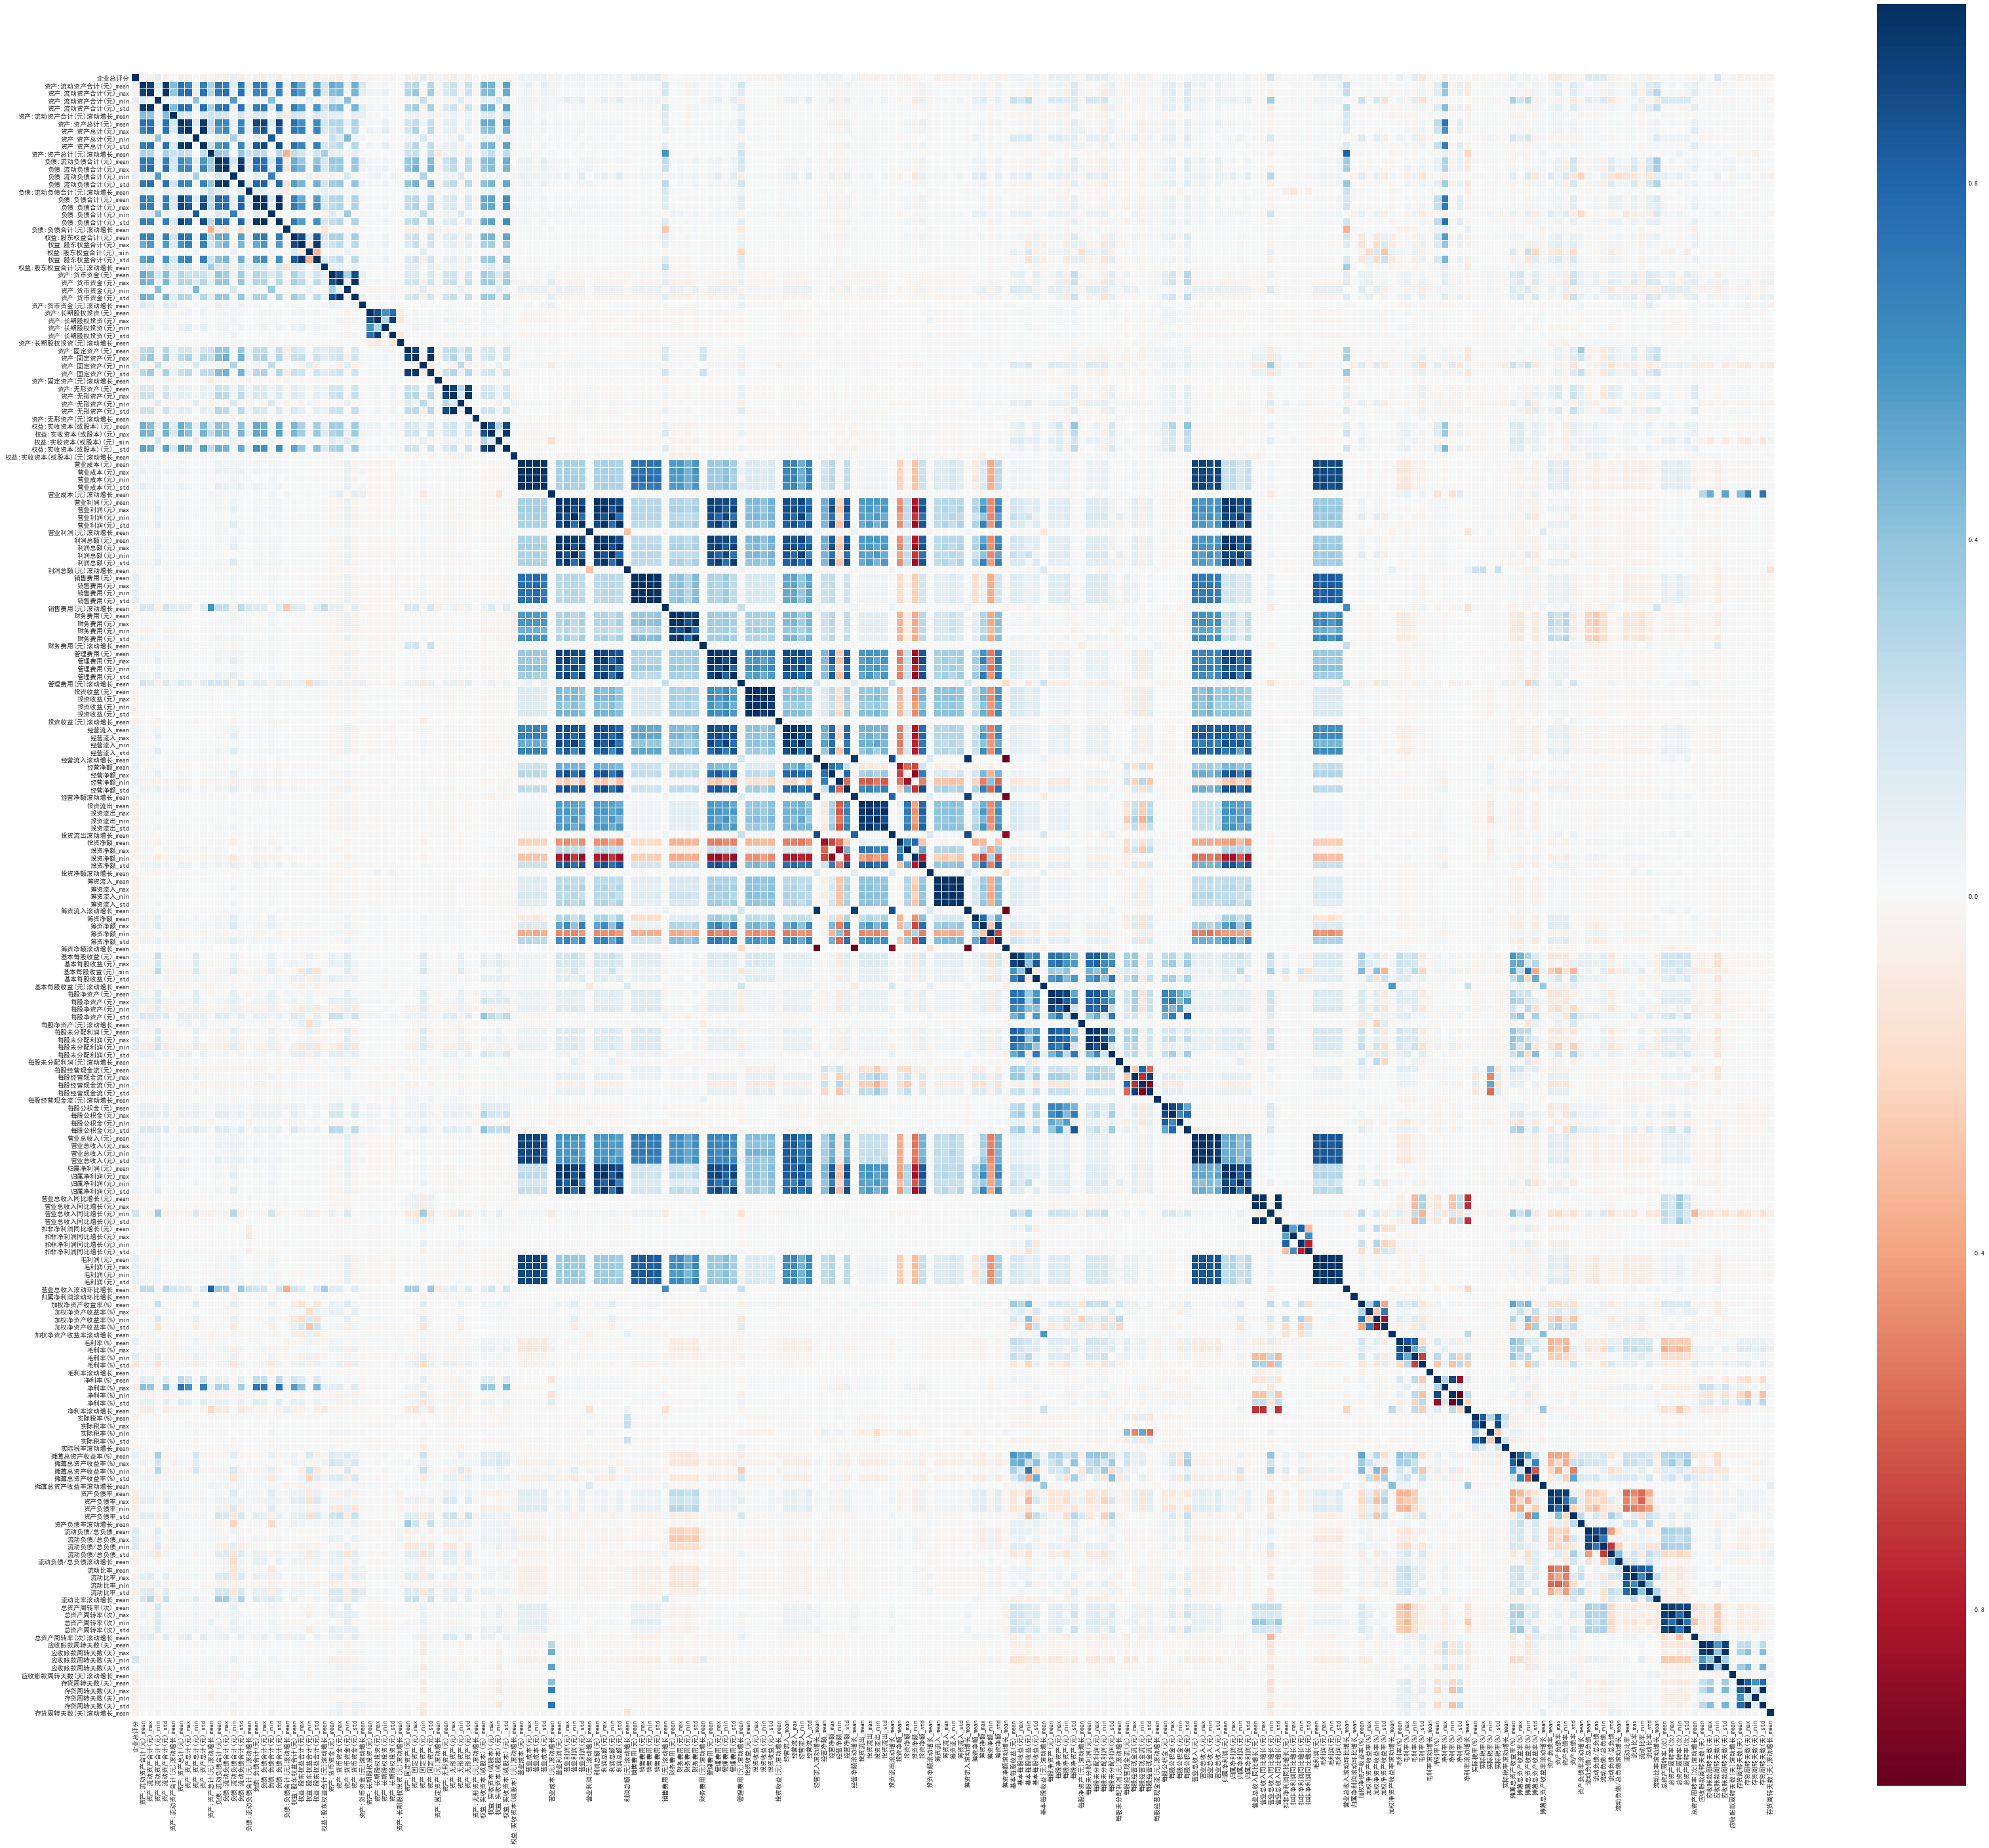

In [269]:
FinacialFeatures_drop = FinacialFeatures.drop(['企业编号'], axis=1)
colormap = plt.cm.RdBu
plt.figure(figsize=(50, 50))
sns.heatmap(FinacialFeatures_drop.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=False)